# Notebook 1. Data Analysis



## 1. Preliminary Data Analysis

### 1.1 Importing Libraries and Dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

**Data 1: member_hold_times_and_packs.tsv**
* memberID - Unique identifiers for each person
* holdtime - number of days the person had the pack
* puzzlepack - name of the pack (may have more than 1 puzzle per pack)

In [3]:
# loading first data about member hold times 
# dataset has 1.9 mb size on disk

member_holdtime_df = pd.read_csv('data/member_hold_times_and_packs_Feb16_2023.tsv', 
                                 sep='\t', header=None, names=["memberID", 'holdtime', 'puzzlepack'])
member_holdtime_df.shape

(19733, 3)

In [4]:
member_holdtime_df.head()

,memberID,holdtime,puzzlepack
0,member1,2.939411,Artifact Puzzles Justin Hillgrove Word Travels...
1,member1,0.998885,DaVici Puzzles Full Moon Feast DaVici Puzzles ...
2,member1,10.865032,DaVici Puzzles Flying Frigate DaVici Puzzles H...
3,member1,22.083971,Liberty Puzzles Haeckel Hummingbirds Nautilus ...
4,member1,5.077603,DaVici Puzzles Diana Zimens City Of Cats


**Data 2: packs.tsv**
* `pack_name` - name of the pack (may have more than 1 puzzle per pack)
* `brand` - brand name of puzzle pack
* `piece_count` - number of pieces in puzzle
* `difficulty_rating` - difficulty rating for puzzle

In [5]:
# loading second data about puzzle packs
# dataset has 98kb size on disk
col_names = ['pack_name', 'brand', 'piece_count', 'difficulty_rating']
packs_df = pd.read_csv('data/packs_Feb16_2023.tsv', sep='\t', header=None, names = col_names)

packs_df.shape

(920, 4)

In [6]:
packs_df.head()

,pack_name,brand,piece_count,difficulty_rating
0,Anne Belle Thompson The Mikado Anne Belle Thom...,Other-Hand-cut,"387,242","A-Easy,A-Easy"
1,Anthology Puzzles Alphonse Mucha La Plume Anth...,NaN,"320,160","Average,Average"
2,Anthology Puzzles Colorful Cat Anthology Puzzl...,NaN,"150,170","Really-Hard,A-Easy"
3,Anthology Puzzles Framed American Gothic Antho...,NaN,"320,300","Average,Average"
4,Anthology Puzzles Over The Moon Anthology Puzz...,NaN,"278,177","Average,A-Easy"


### 1.2 Preliminary Data Analysis
This is done to understand the data better so we can clean it accordingly. Here are some questions we are exploring - 
   1. Does packname have a pattern?
   2. What is the distribution for holdtimes?
   3. Is there an evident relationship between difficulty rating and piece counts?

> 1. Does packname have a pattern?

In [7]:
## Does packname have a pattern?
pd.options.display.max_colwidth = 200
member_holdtime_df['puzzlepack'][0:5]

0    Artifact Puzzles Justin Hillgrove Word Travels South Artifact Puzzles Justin Hillgrove Word Travels West
1                                  DaVici Puzzles Full Moon Feast DaVici Puzzles World&#39;s Greatest Miracle
2                                                    DaVici Puzzles Flying Frigate DaVici Puzzles Hobby Horse
3                                          Liberty Puzzles Haeckel Hummingbirds Nautilus Puzzles Mother Adams
4                                                                   DaVici Puzzles Diana Zimens City Of Cats 
Name: puzzlepack, dtype: object

**Comments**:
- Observe the extra space at the end of "cats ". This shows it has this pack has only one puzzle.
- other strings have the word "Puzzles" twice while 'Diana Zimens City Of Cats ' has it only once. 
- Looks like the first word is a brand or something, then the word "puzzle" and the name of puzzle. For example -
    * DaVici, **Puzzles** Full Moon Feast DaVici **Puzzles** World&#39;s Greatest Miracle 
    * DaVici, **Puzzles** Flying Frigate DaVici **Puzzles** Hobby Horse
    * Liberty, **Puzzles** Haeckel Hummingbirds Nautilus **Puzzles** Mother Adams
    * DaVici, **Puzzles** Diana Zimens City Of Cats 


> 2. What is the distribution for holdtimes?


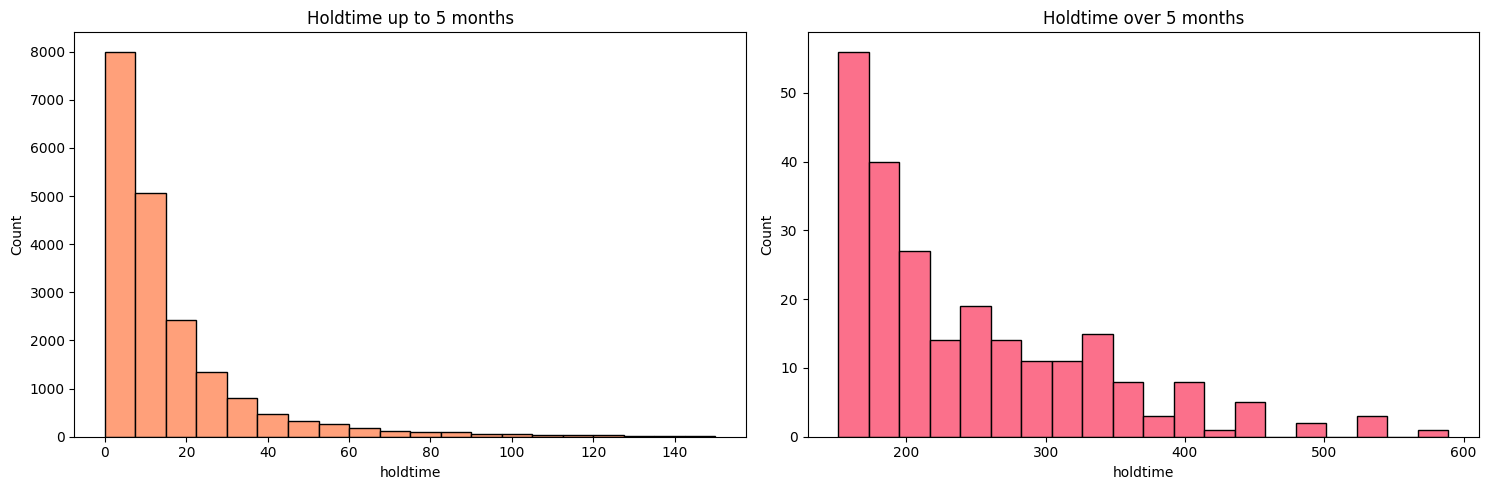

In [8]:
## What is the distribution for holdtimes?
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
sns.histplot(data=member_holdtime_df, x=member_holdtime_df.loc[member_holdtime_df['holdtime'] < 150]['holdtime'], bins = 20,color="#ffa07a", alpha = 1.0, ax=axs[0])
axs[0].set_title("Holdtime up to 5 months")
sns.histplot(data=member_holdtime_df, x=member_holdtime_df.loc[member_holdtime_df['holdtime'] > 151]['holdtime'], bins = 20, color="#FB607F", alpha = 0.9, ax=axs[1])
axs[1].set_title("Holdtime over 5 months")
fig.tight_layout()
#plt.savefig("_static/images/hold_times_dist2.png", format="png", dpi=1200)
plt.show()

**Comments:**
Need to remove outliers in this case



> 3. Is there an evident relationship between difficulty rating and piece counts?

- Separate columns into `piece_count_1`, `piece_count_2`, `difficulty_rating_1`, `difficulty_rating_2`

In [9]:
## Is there an evident relationship between difficulty rating and piece counts?
# making two coulmns for piece count
packs_df['piece_count_1'] = packs_df['piece_count'].str.split(',', expand=True)[0]
packs_df['piece_count_2'] = packs_df['piece_count'].str.split(',', expand=True)[1]
# making two columns for difficulty
packs_df['difficulty_rating_1'] = packs_df['difficulty_rating'].str.split(',', expand=True)[0]
packs_df['difficulty_rating_2'] = packs_df['difficulty_rating'].str.split(',', expand=True)[1]

In [10]:
# creating temporary dataframe with no missing values for analysis
packs_df_temp_1 = packs_df.dropna(axis=0, subset = ['piece_count_1', 'difficulty_rating_1'])
packs_df_temp_2 = packs_df.dropna(axis=0, subset = ['piece_count_2', 'difficulty_rating_2'])

In [11]:
packs_df_temp_1.piece_count_1 = packs_df_temp_1.piece_count_1.astype('int')
packs_df_temp_2.piece_count_2 = packs_df_temp_2.piece_count_2.astype('int')

In [12]:
packs_df.difficulty_rating.unique()

array(['A-Easy,A-Easy', 'Average,Average', 'Really-Hard,A-Easy',
       'Average,A-Easy', 'Hard,A-Easy', 'Hard,Average',
       'Really-Hard,Average', 'Average,Really-Hard', 'Average,Hard',
       'A-Easy,Average', 'Hard,Hard', nan, 'A-Easy,Hard',
       'Really-Hard,Really-Hard', 'A-Easy,Really-Hard',
       'Hard,Really-Hard', 'Really-Hard,Hard'], dtype=object)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


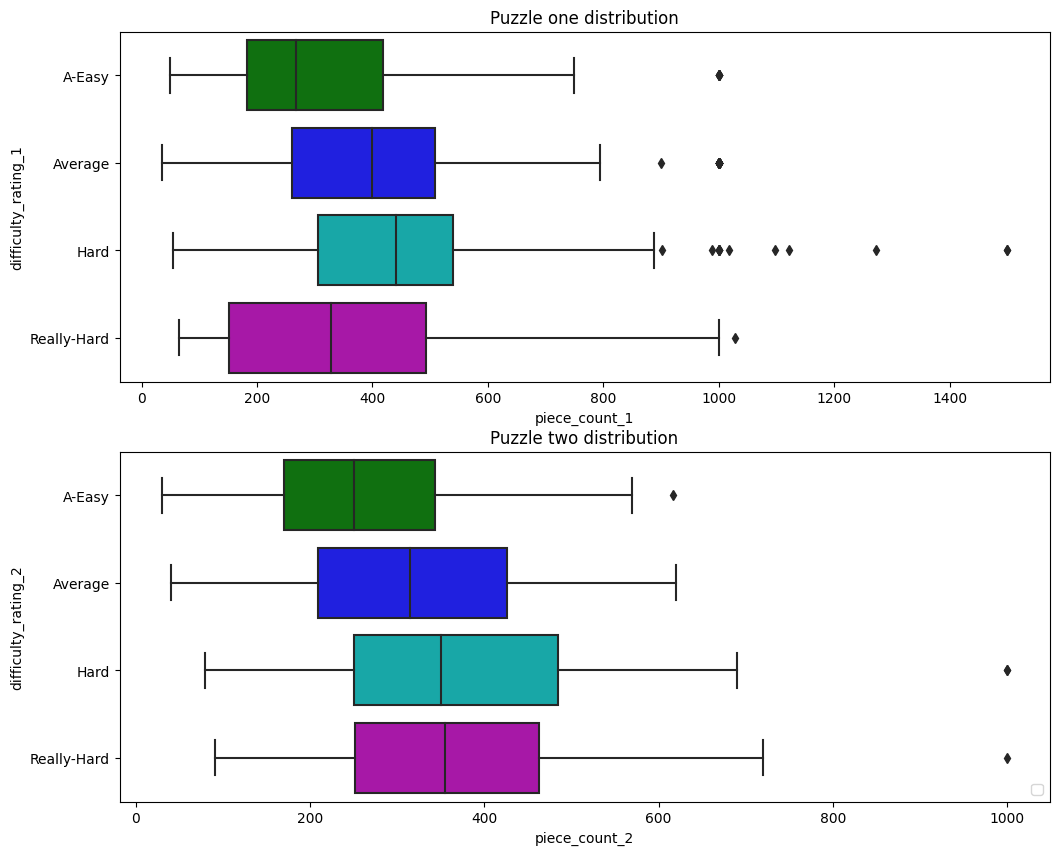

In [13]:
# checking category-wise distribution of piece_count
plt.figure(figsize = [12,10], dpi=100)
color_dict = {'A-Easy':"g", 'Average':"b", 'Hard':"c", 'Really-Hard': "m"}

plt.subplot(2,1,1)
sns.boxplot(x = "piece_count_1", y= 'difficulty_rating_1', data=packs_df_temp_1, 
            palette = color_dict, order = ['A-Easy', 'Average', 'Hard', 'Really-Hard'])
plt.title("Puzzle one distribution")


plt.subplot(2,1,2)
sns.boxplot(x = "piece_count_2", y= 'difficulty_rating_2', data=packs_df_temp_2, 
            palette = color_dict, order = ['A-Easy', 'Average', 'Hard', 'Really-Hard'])
plt.title("Puzzle two distribution")
plt.legend(loc='lower right')
plt.show()

**Comments:**

* "Easy" has the lowest median in both cases and "Hard" has the highest median.
* Need to check this again after data cleaning (outlier removal) at a pack level.


## 2. Data Cleaning

### 2.1 Separating columns


Separate columns into 
- `pack_name`, `brand_0`, `brand_1`, `piece_count_0`, `piece_count_1`, `difficulty_0`, `difficulty_1`

In [14]:
# splitting brand name
packs_df['brand_2'] = packs_df['brand'].str.split(',', expand=True)[1]
packs_df['brand_1'] = packs_df['brand'].str.split(',', expand=True)[0]
# piececount and difficulty were split previously

In [15]:
# adding number of puzzles feature
packs_df['num_puzzles'] = packs_df['pack_name'].map(lambda n: 1 if (n[-1] == ' ') else 2, na_action='ignore')

In [16]:
# fixing datatype - convert piece_count values to integers
packs_df = packs_df.astype({'piece_count_1': 'int64', 'piece_count_2': 'int64'}, errors='ignore')

In [17]:
# checking if we have any duplicate pack names
packs_df.drop_duplicates(['pack_name']).shape, packs_df.shape

((920, 11), (920, 11))

In [18]:
# # Packs with missing difficulty_rating and piece_count are present in members table?
# na_pack_name = packs_df[packs_df[['brand','piece_count', 'difficulty_rating']].isnull().any(axis=1)]
# len(set(na_pack_name['pack_name']).intersection(member_holdtime_df['puzzlepack']))

# -- this code is wrong, need to find a new function instead of .any

# Number of null values
packs_df.isnull().sum()

pack_name                0
brand                   25
piece_count              8
difficulty_rating        4
piece_count_1            8
piece_count_2          181
difficulty_rating_1      4
difficulty_rating_2      4
brand_2                775
brand_1                 25
num_puzzles              0
dtype: int64

In [19]:
# dropping the initial variables
packs_df.drop(['brand', 'piece_count', 'difficulty_rating'], axis=1, inplace=True)

### 2.2 Fixing Data inconsistencies

In [20]:
# Some rows straight up have nothing, drop these as there is nothing to be done
packs_df.dropna(subset = ['difficulty_rating_1', 'difficulty_rating_2', 'piece_count_1', 'piece_count_2', 
                          'brand_1', 'brand_2'], how='all', inplace = True)

In [21]:
# Puzzles with num = 1 but 2 piece_count values
packs_df[(packs_df.num_puzzles == 1) & (packs_df.brand_2.notna() | packs_df.piece_count_2.notna())].head()

,pack_name,piece_count_1,piece_count_2,difficulty_rating_1,difficulty_rating_2,brand_2,brand_1,num_puzzles
37,Artifact Puzzles Nadieh Bremer Coronium Artifact Puzzles Nadieh Bremer Nebulium,172,147,A-Easy,A-Easy,None,Artifact,1
45,Artifact Puzzles Roch Urbaniak Floating Town Artifact Puzzles Kozyndan Forest Dream,228,216,A-Easy,A-Easy,None,Artifact,1
68,Boardwalk Puzzles Alexey Erofalov San Juan Puerto Rico Boardwalk Puzzles Alexey Erofalov Germany,320,317,Average,Average,None,Other-Laser-cut,1
79,DaVici Puzzles Awakening DaVici Puzzles,450,280,A-Easy,A-Easy,None,DaVici,1
100,Davici Puzzles Photo Album Ecru Puzzles Sunny November,600,369,Average,Average,Ecru,DaVici,1


In [22]:
# Some 1 puzzle packs have a second number for pieces, this seems to be legit, updating to be 2 puzzle packs
packs_df.loc[((packs_df.num_puzzles == 1) & (packs_df.piece_count_2.notna())), 'num_puzzles'] = 2

In [23]:
# Some 2 puzzle packs do not have piece count info for second puzzle. 
packs_df[(packs_df.piece_count_2.isna()) & (packs_df.num_puzzles == 2)].head()

,pack_name,piece_count_1,piece_count_2,difficulty_rating_1,difficulty_rating_2,brand_2,brand_1,num_puzzles
9,Artifact Puzzles Bee Eater Artifact Puzzles Kevin Sloan Welcome to the Wilderness,439,None,Hard,A-Easy,None,Artifact,2
61,BellArt Puzzles Double-sided Angel Maze Fish East Texas Piney Woods Puzzles Homer Rushing Spirit Bird,295,None,Average,Average,None,Other-Hand-cut,2
62,Bewilderness Puzzles Caleb Fleisher Unseen. Unheard. Bewilderness Puzzles DeptiAgrawalMittal Celebrations Art,173,None,Really-Hard,Really-Hard,None,Other-Laser-cut,2
113,Ecru Puzzles Aaron Wolf Spells And Sorcery Stave Puzzles Betsy Brown Starry Starry Knight,75,None,Average,Really-Hard,Stave,Ecru,2
255,Liberty Puzzles Paris Air France Ecru Puzzles Robert Delaunay Eiffel Tower,483,None,Average,A-Easy,Liberty,Ecru,2


> For the packs you don't have any piece count data for, assume they are 2 puzzle packs, each with piece count equal to the global average piece count, OR if you can tell what brand it is, use the average for that brand (major brands are: Liberty, Artifact, Ecru, Wentworth, Nautilus, Stave)

In [24]:
packs_df.piece_count_1 = packs_df.piece_count_1.astype('float').astype('Int64')
packs_df.piece_count_2 = packs_df.piece_count_2.astype('float').astype('Int64')
# what is the global average piececount?
packs_df['piece_count_1'].mean(),packs_df['piece_count_2'].mean()

(400.0668859649123, 314.64005412719894)

In [25]:
avg_pc2 = packs_df['piece_count_2'].mean()

In [26]:
# making the piececount_2 same as piececount_1 IF num_puzzles ==2
packs_df.loc[((packs_df['piece_count_2'].isna() ) &(packs_df['num_puzzles'] ==2)), 'piece_count_2'] = int(avg_pc2)

In [27]:
# making the brand_2 same as brand_1
packs_df.loc[(packs_df['brand_2'].isna()), 'brand_2'] = packs_df['brand_1']

In [28]:
# packs with 1 puzzle but 2 brands? 

### 2.3 Dealing with Missing value

In [29]:
member_holdtime_df.isnull().sum()

memberID      0
holdtime      0
puzzlepack    0
dtype: int64

In [30]:
member_holdtime_df.nunique()

memberID        717
holdtime      19527
puzzlepack      972
dtype: int64

**Comments:**
- No missing values in the data
- We have information about 675 members and 910 unique puzzle packs

In [31]:
packs_df.isnull().sum()

pack_name                0
piece_count_1            4
piece_count_2          166
difficulty_rating_1      0
difficulty_rating_2      0
brand_2                 21
brand_1                 21
num_puzzles              0
dtype: int64

In [32]:
packs_df.nunique()

pack_name              916
piece_count_1          414
piece_count_2          317
difficulty_rating_1      4
difficulty_rating_2      4
brand_2                  9
brand_1                  9
num_puzzles              2
dtype: int64

**Comments:Imputing missing values strategy**
- Rows with missing difficulty_rating and piece_count are removed (none of these were seen in members data)
- Brand: 
    * if brand_2 and brand_1 has value - put same value (done in 2.2)
    * for rest of them - replace missing with unknown
- piece_count:
    * Calculate average_piece_count at diffuclty level 
    * for one puzzle: replace nan with average_piece_count
    * for two puzzles: replace nan with average_piece_count twice

In [33]:
packs_df[['brand_1', 'brand_2']] = packs_df[['brand_1', 'brand_2']].fillna('unknown')

In [34]:
# puzzles which have no value for both piece_1 and piece_2 are dropped
packs_df.dropna(subset = ['piece_count_1', 'piece_count_2'], inplace=True, how='all')

In [35]:
packs_df['piece_count_2'].fillna(0, inplace=True)
packs_df['difficulty_rating_2'].fillna('Average', inplace=True)

### 2.4 Dealing with Outliers

In [36]:
member_holdtime_df = member_holdtime_df[(member_holdtime_df['holdtime'] >= 0.1) & 
                                        (member_holdtime_df['holdtime'] <= 150)]

## 3. Merging Data

In [37]:
member_holdtime_df.puzzlepack.nunique(), packs_df.pack_name.nunique(), 

(968, 913)

In [38]:
df = member_holdtime_df.merge(packs_df, left_on='puzzlepack', right_on='pack_name', how='inner')
df.head(2)

,memberID,holdtime,puzzlepack,pack_name,piece_count_1,piece_count_2,difficulty_rating_1,difficulty_rating_2,brand_2,brand_1,num_puzzles
0,member1,2.939411,Artifact Puzzles Justin Hillgrove Word Travels South Artifact Puzzles Justin Hillgrove Word Travels West,Artifact Puzzles Justin Hillgrove Word Travels South Artifact Puzzles Justin Hillgrove Word Travels West,456,548,A-Easy,Average,Artifact,Artifact,2
1,member15,16.840847,Artifact Puzzles Justin Hillgrove Word Travels South Artifact Puzzles Justin Hillgrove Word Travels West,Artifact Puzzles Justin Hillgrove Word Travels South Artifact Puzzles Justin Hillgrove Word Travels West,456,548,A-Easy,Average,Artifact,Artifact,2


In [39]:
difficulty_mapping = {'A-Easy': 1, 'Average': 2, 'Hard': 3, 'Really-Hard': 4}

df['difficulty_rating_1'] = df['difficulty_rating_1'].map(lambda x: difficulty_mapping[x], na_action='ignore')
df['difficulty_rating_2'] = df['difficulty_rating_2'].map(lambda x: difficulty_mapping[x], na_action='ignore')

In [40]:
df.isnull().sum()

memberID                0
holdtime                0
puzzlepack              0
pack_name               0
piece_count_1          24
piece_count_2           0
difficulty_rating_1     0
difficulty_rating_2     0
brand_2                 0
brand_1                 0
num_puzzles             0
dtype: int64

In [41]:
# masking puzzle names 
df.drop(['puzzlepack'], axis=1, inplace = True)

In [ ]:
df.to_csv('data/members_packs_cleaned.csv', index=False)